In [1]:
import sys
from PIL import Image
import os
sys.path.append("./../../../../")
from src.opendr.simulation.human_model_generation.pifu_generator import PIFuGenerator
import matplotlib.pyplot as plt
import numpy as np
current_dir = os.getcwd()

ModuleNotFoundError: No module named 'wget'

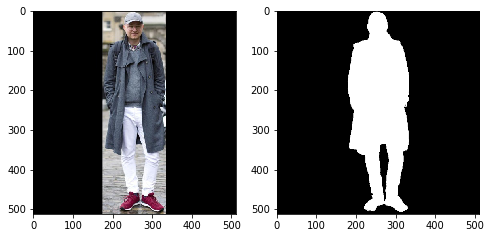

In [2]:
# Load input image and mask
rgb_img = Image.open(os.path.join(current_dir,'imgs_input/rgb/result_0004.jpg'))
msk_img = Image.open(os.path.join(current_dir,'imgs_input/msk/result_0004.jpg'))
%matplotlib inline
f, axarr = plt.subplots(1,2,figsize=(8,8))
axarr[0].imshow(np.asarray(rgb_img))
axarr[1].imshow(np.asarray(msk_img))

In [ ]:
# Initialize PIFu and infer 
model_generator = PIFuGenerator(device='cuda')
[model_3D, human_pose_3D] = model_generator.infer(imgs_rgb=[rgb_img], imgs_msk=[msk_img], extract_pose=True)
#model_3D = model_generator.infer(imgs_rgb=[rgb_img], imgs_msk=[msk_img])

In [ ]:
# Get renderings of the 3D model in various views (rotations)
rotations = [0, 45, 90, 180]
[out_imgs, human_pose_2D] = model_generator.get_img_views(model_3D = model_3D, rotations = rotations, human_pose_3D = human_pose_3D, plot_kps=False)
#out_imgs = model_generator.get_imgs_views(model_3D = model_3D, rotations = rotations)

In [ ]:
# Visualize views and 2D joints
f, axarr = plt.subplots(1, 4, figsize=(15,15))
axarr[0].imshow(np.asarray(out_imgs[0]))
axarr[1].imshow(np.asarray(out_imgs[1]))
axarr[2].imshow(np.asarray(out_imgs[2]))
axarr[3].imshow(np.asarray(out_imgs[3]))